In [132]:
# python package to generate network graphs for project planning

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import argparse

# create nodes, edges, and time for each task

def create_nodes_edges_time(df):
    nodes = []
    edges = []
    time = []
    for i in range(len(df)):
        nodes.append(df['Task'][i])
        time.append(df['Time'][i])
        if pd.isnull(df['Dependencies'][i]):
            continue
        else:
            for j in df['Dependencies'][i].split(','):
                edges.append((j, df['Task'][i]))
    return nodes, edges, time

def create_nodes_edges_time(df):
    nodes = []
    node_type = []
    edges = []
    time = []
    for i in range(len(df)):
        #print(df['taskID'][i])
        nodes.append(df['taskID'][i])
        node_type.append(df['Type'][i])
        if df['predecessorTaskIDs'][i] != 'None':
            for j in df['predecessorTaskIDs'][i].split(','):
                #df['predecessorTaskIDs'][i]
                # remove trailing whitespace
                j = j.strip()
                edges.append((j, df['taskID'][i]))
                time.append(df['expectedHours'][i])
    return nodes, node_type, edges, time

In [128]:
# createa a dataframe for the nodes, node_type, edges, and time

def create_df(nodes, edges, time):
    df = pd.DataFrame()
    df['Task'] = nodes
    df['Time'] = time
    df['Dependencies'] = edges
    return df

# show size of list nodes, edges, and time

def show_size(nodes, edges, time):
    print('Number of nodes:', len(nodes))
    print('Number of edges:', len(edges))
    print('Number of time:', len(time))

show_size(nodes, edges, time)


Number of nodes: 15
Number of edges: 19
Number of time: 19


In [134]:
# create nodes, edges, time for each task
nodes, node_type, edges, time = create_nodes_edges_time(df)

# create a dictionary of nodes and node types
node_dict = dict(zip(nodes, node_type))

# create a dictionary for the edges and time
edge_dict = dict(zip(edges, time))

In [142]:
G.edges(data=True)

OutEdgeDataView([('A', 'C', {}), ('A', 'D1', {}), ('A', 'G', {}), ('B', 'E', {}), ('C', 'E', {}), ('D1', 'D2', {}), ('D1', 'D3', {}), ('D2', 'D4', {}), ('D3', 'D4', {}), ('D4', 'D5', {}), ('D4', 'D6', {}), ('D5', 'D8', {}), ('D6', 'D7', {}), ('D7', 'D8', {}), ('D8', 'F', {}), ('D8', 'G', {}), ('E', 'F', {}), ('F', 'H', {}), ('G', 'H', {})])

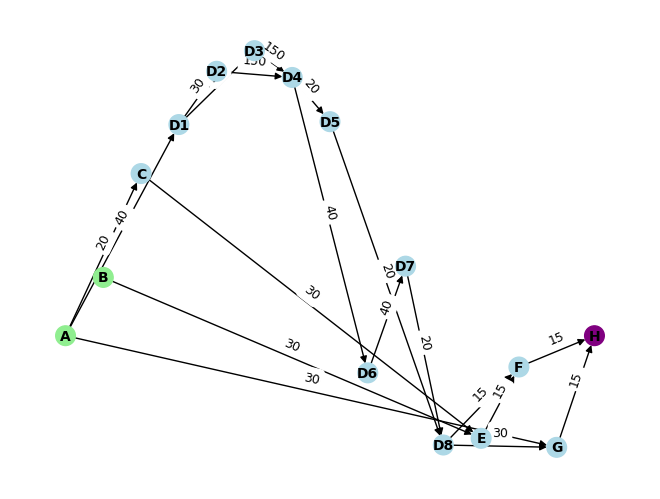

In [659]:
# create a graph plot
# nodes are in the node_dict
# edges are in the edge_dict

G = nx.DiGraph()
G.add_nodes_from(node_dict)

# use the wieght of the edges the value of the edge_dict
for k, v in edge_dict.items():
    G.add_edge(k[0], k[1], weight=v)

# create a layout for the graph
pos = nx.spring_layout(G)


# create a list of shapes and colors based on the node type in the node_dict
colors = []
for i in node_dict.values():
    if i == 'Start':
        colors.append('lightgreen')
    elif i == 'End':
        colors.append('purple')
    else:
        colors.append('lightblue')

# start the position of the nodes at (0,0)
# then add a small amount of noise to the position
# use the previous node to determine the position of the next node

pos = {}
for i, node in enumerate(G.nodes()):
    if i == 0:
        pos[node] = np.array([0, 0])
    else:
        pos[node] = pos[prev_node] + (0.1,np.random.normal(0.01, 1))
    prev_node = node

pos['H'][1] = 0

# draw the graph
# add jitter to the position of the edges_labels
nx.draw(G, pos, with_labels=True, node_size=200, node_color=colors, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')

# add jitter to the pos dict
for k, v in pos.items():
    pos[k] = v + [0, 0.1]

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
plt.show()




In [131]:
# read data from excel file 'project_plan_simple.xlsx'
# file is stored at 'C:\Users\HHolanda\Downloads\project_plan_simple.xlsx'

file_path = 'C:\\Users\\HHolanda\\Downloads\\project_plan_simple.xlsx'

def read_data(file):
    df = pd.read_excel(file)
    return df

# read data from excel file 'project_plan_simple.xlsx'
df = read_data(file_path)

# tranform NaN into 'None'
df = df.fillna('None')

# display data
print(df)

   taskID                          task Explanation predecessorTaskIDs  \
0       A              Describe product        None               None   
1       B    Develop marketing strategy        None               None   
2       C               Design brochure        None                  A   
3      D1         Requirements analysis        None                  A   
4      D2               Software design        None                 D1   
5      D3                 System design        None                 D1   
6      D4                        Coding        None             D2, D3   
7      D5           Write documentation        None                 D4   
8      D6                  Unit testing        None                 D4   
9      D7                System testing        None                 D6   
10     D8          Package deliverables        None             D5, D7   
11      E       Survey potential market     Reseach               B, C   
12      F          Develop pricing pla

In [25]:
# create a linear program to solve the project planning problem to minimize the time to complete the project
# the objective function is to minimize the time to complete the project
# the constraints are the dependencies between the tasks

import pulp as pl



'A'